In [1]:
import copy
from functools import partial

from scipy.stats import norm, chi2
from scipy.optimize import minimize
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline

In [4]:
# random normally distributed error
error = norm(0.0, 1.0)

In [5]:
# true cubic function
beta = np.array([1., 2., -3., 4.])

In [6]:
# x, 100 samples between 0 and 1
x = np.arange(0.0, 1.0, .01)
x_shape = (len(x), 1)
x = np.reshape(x, x_shape)

In [7]:
# creating features x^0, x^1, x^2 x^3, then splitting in to a train/testing set
X_input = np.concatenate([np.ones(x_shape), x, x**2, x**3], axis=1)

In [8]:
# create the true Y
Y = np.matmul(X_input, beta)

In [9]:
# apply our normally distributed error
Y_with_errors = Y + error.rvs(len(Y))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_input, Y_with_errors)

In [11]:
# predict using linear regression
regression = linear_model.LinearRegression(fit_intercept=False)
regression.fit(X_train, Y_train)
Y_hat = regression.predict(X_input)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [12]:
# mean squared error on train set
mean_squared_error(Y_train, regression.predict(X_train))

0.79483917461269282

In [13]:
# mean squared error on the test set
mean_squared_error(Y_test, regression.predict(X_test))

0.79507070156796578

In [14]:
# train random forest predictor on train set
forest = RandomForestRegressor(100)
forest.fit(X_train, Y_train)
Y_hat_forest = forest.predict(X_input)

In [15]:
# random forest can reduce the error of the training set by a lot
mean_squared_error(Y_train, forest.predict(X_train))

0.17336153775520638

In [16]:
# however, its test error is actually much higher then the linear regression error
# when train error is very low and test error is very high, the predictor is said
# to be overfitting
mean_squared_error(Y_test, forest.predict(X_test))

1.2075179630226716

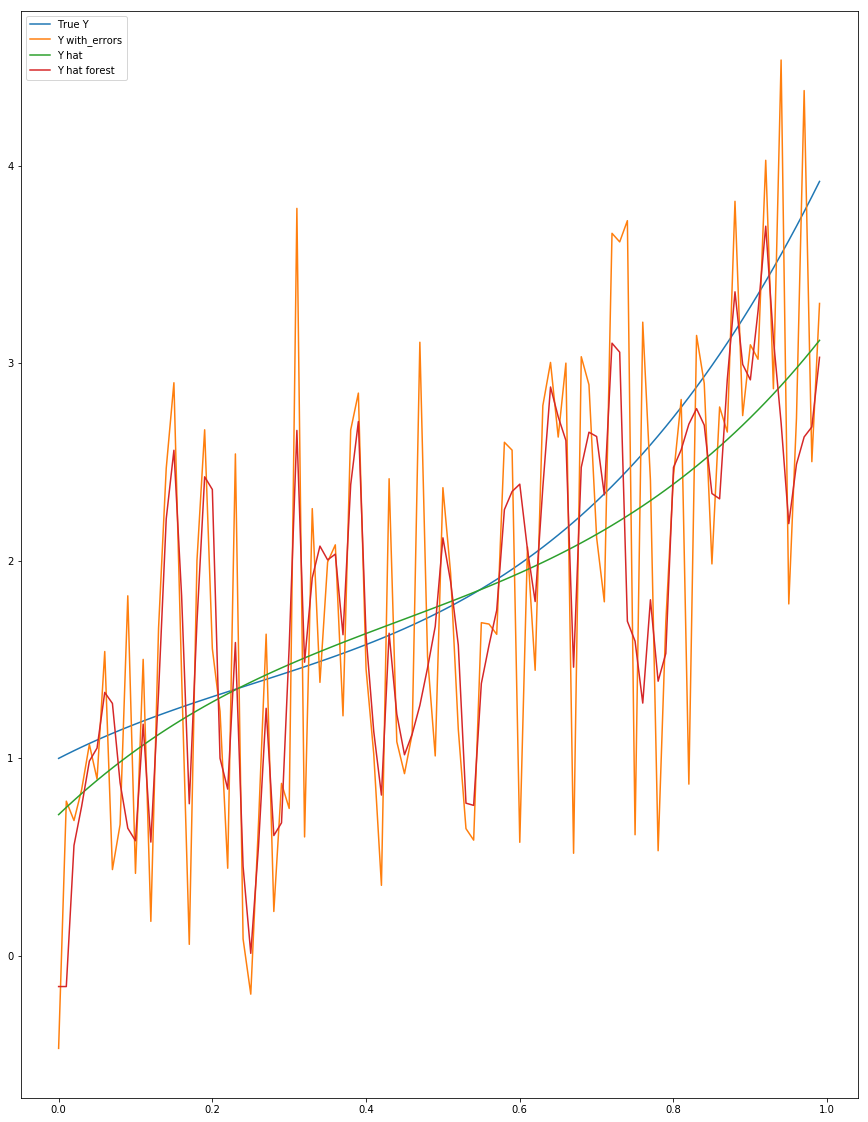

In [17]:
# from the plot, its clear the random forest is overfitting to the errors whereas
# the linear regression is following the true function much closer
# this is because our dataset has relatively few samples and a very noisy dataset
plt.figure(figsize=(15, 20))
plt.plot(x, Y, label='True Y')
plt.plot(x, Y_with_errors, label='Y with_errors')
plt.plot(x, Y_hat, label='Y hat')
plt.plot(x, Y_hat_forest, label='Y hat forest')
plt.legend()

In this case, the bayes error rate ( the best any classifier could do ), would be $$\mathbb{E}(errors) = \int|\mathcal{N(0, 1)}| = \sqrt{\frac{2}{\pi}} = 0.797884560802865$$

https://en.wikipedia.org/wiki/Half-normal_distribution

Any value of mean squared error less that that for the training set would be overfitting

In [18]:
# we can see this by calculating the mean squared error of the true function to the function with
# errors is above the bayes error rate, and we add more samples it should appro
mean_squared_error(Y_with_errors, Y)

0.81882411292504687